<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Functions-for-plotting-distribution-of-losses-across-chromosomes" data-toc-modified-id="Functions-for-plotting-distribution-of-losses-across-chromosomes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Functions for plotting distribution of losses across chromosomes</a></span></li><li><span><a href="#Functions-for-plotting-change-in-fitness-and-mutation-rate-with-loss-length" data-toc-modified-id="Functions-for-plotting-change-in-fitness-and-mutation-rate-with-loss-length-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Functions for plotting change in fitness and mutation rate with loss length</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#UK-Biobank-mCA-calls" data-toc-modified-id="UK-Biobank-mCA-calls-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>UK Biobank mCA calls</a></span></li><li><span><a href="#Possible-significant-genes-involved-by-each-mCA" data-toc-modified-id="Possible-significant-genes-involved-by-each-mCA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Possible significant genes involved by each mCA</a></span></li><li><span><a href="#Inferred-s-and-mu-values" data-toc-modified-id="Inferred-s-and-mu-values-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Inferred s and mu values</a></span></li></ul></li><li><span><a href="#Distribution-of-losses-around-key-genes" data-toc-modified-id="Distribution-of-losses-around-key-genes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Distribution of losses around key genes</a></span></li><li><span><a href="#Length-dependence-of-fitness-effects-and-mutation-rates" data-toc-modified-id="Length-dependence-of-fitness-effects-and-mutation-rates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Length dependence of fitness effects and mutation rates</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [23]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import csv
import pandas as pd
import zipfile
from io import TextIOWrapper

In [2]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [3]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [4]:
loss_color = '#a6cee3'
loss2_color = '#1f78b4'
loss_text = '#1f78b4'

In [5]:
color_type_dict = {'c_gain': '#e31a1c', 'b_neutral': '#fdbf6f', 'a_loss': '#a6cee3'}

# Functions

## Functions for plotting distribution of losses across chromosomes

In [6]:
def ideograms(ideogram_file, chromosome):
    
    color_lookup = {'gneg': (1., 1., 1.),
                    'gpos25': (.6, .6, .6),
                    'gpos50': (.4, .4, .4),
                    'gpos75': (.2, .2, .2),
                   'gpos100': (0., 0., 0.),
                      'acen': (.8, .4, .4),
                      'gvar': (.8, .8, .8),
                     'stalk': (.9, .9, .9)}
    
    ideogram = open(ideogram_file)
    ideogram.readline()
    xranges = []
    colors = []
    mid_points = []
    labels = []

    for line in ideogram:
        chrom, start, stop, label, stain = line.strip().split('\t')
        start = int(start)
        stop = int(stop)
        width = stop - start
        mid_point = start + (width/2)
        if chrom == chromosome:
            xranges.append((start, width))
            colors.append(color_lookup[stain])
            mid_points.append(mid_point)
            labels.append(label)
        
    return xranges, [0, 0.9], colors, mid_points, labels

In [7]:
def plot_gene(gene_midpoint, gene_name, association, y_val, ax):
    if association == 'CNLOH':
        color_choice = neutral_line
        text_color = neutral_text
    if association == 'Loss':
        color_choice = loss2_color
        text_color = loss_text
    if association == 'Gain':
        color_choice = gain_color
        text_color = gain_text
    ax.plot([gene_midpoint, gene_midpoint], [0, y_val+1], linestyle = ':', lw = 1.5, color = color_choice)
    ax.text(gene_midpoint, (y_val+1)*1.02, gene_name, ha = 'left', fontsize = 10, color = text_color, style='italic', fontweight = 'bold', rotation = 45)
    return ax

In [8]:
def plot_gene_CH(gene_midpoint, gene_name, y_val, ax):
    ax.plot([gene_midpoint, gene_midpoint], [0, y_val+1], linestyle = ':', lw = 1.5, color = grey3)
    ax.text(gene_midpoint, (y_val+1)*1.02, gene_name, ha = 'left', fontsize = 10, color = grey3, style='italic', rotation = 45)
    return ax

In [9]:
def plot_region(gene_midpoint, gene_name, association, y_val, ax):
    if association == 'CNLOH':
        color_choice = neutral_line
        text_color = neutral_text
    if association == 'Loss':
        color_choice = loss2_color
        text_color = loss_text
    if association == 'Gain':
        color_choice = gain_color
        text_color = gain_text
    ax.plot([gene_midpoint, gene_midpoint], [0, y_val+1], linestyle = ':', lw = 1.5, color = color_choice)
    ax.text(gene_midpoint, (y_val+1)*1.02, gene_name, ha = 'center', fontsize = 10, color = text_color, style='italic')
    return ax

In [10]:
def shade_deletion(start, stop, name, y_val, ax):
    ax.fill_between([start, stop], [0, 0], [y_val+1, y_val+1], facecolor="none", hatch="//////", edgecolor=grey2, linewidth=0.0, alpha = 0.5)
    ax.fill_between([start, stop], [0, 0], [y_val+1, y_val+1], color='white', linewidth=0.0, alpha = 0.4)  
    ax.text(((stop+start)/2), (y_val+1)*1.02, name, ha = 'center', fontsize = 10, color = loss_text, style='italic')
    return ax

In [11]:
def distribution_losses(chromosome, genes_involved, total_mCAs):
    plt.close('all')
    gs_kw = dict(width_ratios=[1], height_ratios=[4, 1])
    fig, axes = plt.subplots(figsize=(15, 3), nrows=2, ncols=1, gridspec_kw=gs_kw)
    fig.subplots_adjust(hspace=0.02, wspace = 0.02)

    ax1 = axes[0]
    ax2 = axes[1]

    # Plot data
    positions = []
    for k, v in CNV_dict.items():
        type_of_change = v[5]
        total_mCAs_per_person = v[10]
        if type_of_change == 'loss':
            type_of_change = 'a_loss'
            if v[1] == chromosome:
                start = int((v[2])*1000000)
                end = int((v[3])*1000000)
                width = end-start
                if total_mCAs == 'all':
                    positions.append((start, end, width, type_of_change))
                else:
                    if total_mCAs_per_person == total_mCAs:
                        positions.append((start, end, width, type_of_change))

    positions.sort(key = lambda x: (x[3], x[2]), reverse = True) #sort the positions list by width (with widest change first)

    sorted_positions = []
    
    y_val = 0
    
    for i in positions: #iterate through the width sorted list and add 1 to the y for each mCA (as width decreases)
        start = i[0]
        end = i[1]
        width = i[2]
        color_type = color_type_dict[i[3]]
        sorted_positions.append((start, end, width, y_val, color_type))
        y_val+=1

    for i in sorted_positions: #iterate through the sorted list
        y_value = i[3]
        color_type = i[4]
        ax1.plot([i[0], i[1]], [y_value, y_value], color = color_type, lw = 2)
        
    ###### PLOT GENES ######    
    genes_possibly_involved = genes_involved[chromosome]
    for i in genes_possibly_involved:
        gene_name = i[0]
        midpoint = i[1]
        effect = i[2]
        if (effect != '') and (effect in ['Loss']):
            plot_gene(midpoint, gene_name, effect, y_val, ax1)
        else:
            plot_gene_CH(midpoint, gene_name, y_val, ax1)
        
    if chromosome == 'chr14':
        shade_deletion(106032614, 107288051, 'IGH locus', y_val, ax1) #IGH locus
        
    if chromosome == 'chr22':
        plot_region(22600000, 'IGL locus (22q11.2)', 'Loss', y_val, ax1)        

    ##### Plot chromosome #####
    xranges, yrange, colors, midpoints, labels = ideograms('Data_files/Chromosome_ideogram_hg19.txt', chromosome)

    ax2.broken_barh(xranges, yrange, facecolors= colors, edgecolor = 'black')

    end_chromosome = xranges[-1][0]+xranges[-1][1]+1000000

    ax1.set_xticks([])
    ax1.set_xlim(0, end_chromosome)
    ax2.set_xlim(0, end_chromosome)
    
    ax1.set_ylim(0, y_val+10)

    ax2.set_xticks(midpoints)
    ax2.set_xticklabels(labels, rotation = 90, fontsize = 9)
    ax2.set_yticks([])
    ax2.text(-0.06, 0.35, chromosome, transform=ax2.transAxes, fontsize = 14, fontweight = 'bold')
    ax2.text(1.005, 0.35, str(int(end_chromosome/1000000))+' MB', transform=ax2.transAxes, fontsize = 10, fontweight = 'bold', ha = 'left')

    ax1.yaxis.set_tick_params(width=1.0, color = grey3, length = 6)
    ax2.xaxis.set_tick_params(width=0.8, color = grey3, length = 6)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    
    ax1.set_ylabel('mCA number')

    plt.minorticks_off()
    plt.tight_layout()
#     plt.savefig('Figures/Distribution_of_mCAs_across_chromosomes/Length_dependence_losses_'+str(chromosome)+'_total_1_mCA_per_person.pdf')
    
    return plt.show()

## Functions for plotting change in fitness and mutation rate with loss length

In [12]:
def change_s_mu_length_plot(gene_or_region_of_interest, s_mu_length_dependence_dict, s_min, s_max, mu_min, mu_max):

    s_dict = {}
    mu_dict = {}
    
    s_CI_dict = {}
    mu_CI_dict = {}
    
    s_lower_error = []
    s_upper_error = []
    
    mu_lower_error = []
    mu_upper_error = []
    
    x1 = []
    y1 = []
    
    x2 = []
    y2 = []
    
    labels = []

    for k, v in s_mu_length_dependence_dict.items(): #e.g. k = 'ASXL1_30-100MB'
        gene_or_region = k.split('_')[0]
        if gene_or_region == gene_or_region_of_interest:
            s = v['s']*100
            lower_s = v['lower_95_s']*100
            upper_s = v['upper_95_s']*100
            low_s = s-lower_s
            high_s = upper_s-s

            mu = v['mu']
            lower_mu = v['lower_95_mu']
            upper_mu = v['upper_95_mu']
            low_mu = mu-lower_mu
            high_mu = upper_mu-mu

            interval = k.split('_')[1].split('MB')[0] #e.g. '30-100'
            if interval == '0-3':
                interval_point = 1.5
                labels.append('0-3 MB')
            if interval == '3-10':
                interval_point = 6.5
                labels.append('3-10 MB')
            if interval == '10-30':
                interval_point = 20
                labels.append('10-30 MB')
            if interval == '30-100':
                interval_point = 65
                labels.append('30-100 MB')
            if interval == '100-300':
                interval_point = 200
                labels.append('100-300 MB')

            x1.append(interval_point)
            y1.append(s)
            s_lower_error.append(low_s)
            s_upper_error.append(high_s)

            x2.append(interval_point)
            y2.append(mu)
            mu_lower_error.append(low_mu)
            mu_upper_error.append(high_mu)
        
    s_errors = [tuple(s_lower_error), tuple(s_upper_error)]            
    mu_errors = [tuple(mu_lower_error), tuple(mu_upper_error)]
        
    ###### CREATE THE SUBPLOTS #########
    fig, axes = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)
    fig.subplots_adjust(hspace=0.3, wspace = 0.3)
    
    ax1 = axes[0]
    ax2 = axes[1]

    ## Plot the data ###    
    m_width = 1.5
    c_size = 3
    c_thick = 1.5
    e_width = 1.5
    
    color = loss_color
    integral_limit = 0.67
    
    ax1.errorbar(x1, y1, yerr = s_errors, capsize = 8, elinewidth = 2.5, capthick = 2.5)
    ax2.errorbar(x2, y2, yerr = mu_errors, capsize = 8, elinewidth = 2.5, capthick = 2.5)

    ax1.scatter(x1, y1, color = color, lw = 1, s = 200, zorder = 50, edgecolor = 'k')
    ax1.plot(x1, y1, color = color, lw = 2)
    
    ax2.scatter(x2, y2, color = color, lw = 1, s = 200, zorder = 50, edgecolor = 'k')
    ax2.plot(x2, y2, color = color, lw = 2)
    
    ax1.set_ylabel('fitness effect (% per year)', fontsize = 16)
    ax2.set_ylabel('mutation rate (per cell per year)', fontsize = 16)
    
    for ax in [ax1, ax2]:
        ax.set_xlim(0.7, 100)
        ax.set_xscale('log')
        ax.set_xlabel('length of loss (MB)', fontsize = 16)
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
    
    ax2.set_yscale('log')
    ax2.set_ylim(mu_min, mu_max)
        
    ax1.grid(which = 'both', axis = 'y')
    ax2.grid(which = 'both', axis = 'y')
    
    ax1.set_ylim(s_min, s_max)
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))
    
    for x, y, label in zip(x1, y1, labels):
        ax1.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-50), # distance from text to points (x,y)
                     ha='center',
                     bbox=dict(boxstyle="round", fc="w", ec=grey4, lw=1), fontsize = 14) # horizontal alignment can be left, right or center
        
    for x, y, label in zip(x2, y2, labels):
        ax2.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-50), # distance from text to points (x,y)
                     ha='center',
                     bbox=dict(boxstyle="round", fc="w", ec=grey4, lw=1), fontsize = 14) # horizontal alignment can be left, right or center
        
    ax1.set_title(gene_or_region_of_interest+':  change in fitness with loss length', fontsize = 16, y = 1.05)
    ax2.set_title(gene_or_region_of_interest+':  change in mutation rate with loss length', fontsize = 16, y = 1.05)
    
    plt.tight_layout()
#     plt.savefig('Figures/Length_dependence/Loss_around_'+gene_or_region_of_interest+'_change_in_s_and_mu_with_length.pdf')
    
    return plt.show()

# Import data

## UK Biobank mCA calls

In [25]:
# create a dictionary from annotated mCA calls
with zipfile.ZipFile('Data_files/Supplementary_data_annotated_cw.csv.zip') as zf:
    with zf.open('Supplementary_data_annotated_cw.csv', 'r') as infile:
        read_reader = csv.reader(TextIOWrapper(infile, 'utf-8'))  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count = 0
        CNV_dict = {}

        for row in read_reader:
            if row_count>0:
                ID = int(row[1])
                sex = row[2]
                age = row[3]
                prev_cancer = int(row[4])
                chrom = 'chr'+(row[5])
                start_mb = float(row[6])
                end_mb = float(row[7])
                size_mb = float(row[8])
                copy_change = row[11]
                cell_frac = row[12]
                total_mCAs = int(row[22])
                if cell_frac != 'unknown':
                    CNV_dict[row_count]=(float(cell_frac), chrom, start_mb, end_mb, size_mb, copy_change, ID, sex, age, prev_cancer, total_mCAs)

            row_count += 1

## Possible significant genes involved by each mCA

In [27]:
# create a dictionary of gene names with which to annotate the chromosomes
genes_involved_per_chromosome = {}

genes_involved_table = ('Data_files/Possible_genes_involved.csv')
with open(genes_involved_table, encoding = "ISO-8859-1") as table:
    reader = csv.reader(table)
    row_count=0
    for row in reader:
        if row_count>0:
            chromosome = row[0]
            gene = row[1]
            gene_or_region = row[2]
            effect = row[3]
            if gene_or_region == 'Gene':
                start = int(row[5])
                end = int(row[6])
                mid_point = (end+start)/2
                if 'chr'+chromosome in genes_involved_per_chromosome.keys():
                    genes_involved_per_chromosome['chr'+chromosome].append((gene, mid_point, effect))
                else:
                    genes_involved_per_chromosome['chr'+chromosome]=[(gene, mid_point, effect)]
       
        row_count+=1

## Inferred s and mu values

- Fitness and mutation rates inferred using mCA_mu_and_s_MLE_using_heatmaps_length_dependence_genes.py and mCA_mu_and_s_MLE_using_heatmaps_length_dependence_chromosomal_bands.py

In [28]:
#s and mu values inferred from MLE for different lengths of loss around certain regions/ genes
s_mu_length_dependence = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_length_dependence_mCAs.txt', sep = '\t')
s_mu_length_dependence = s_mu_length_dependence.set_index('mCA')
s_mu_length_dependence_dict = pd.DataFrame.to_dict(s_mu_length_dependence, orient = 'index')

# Distribution of losses around key genes

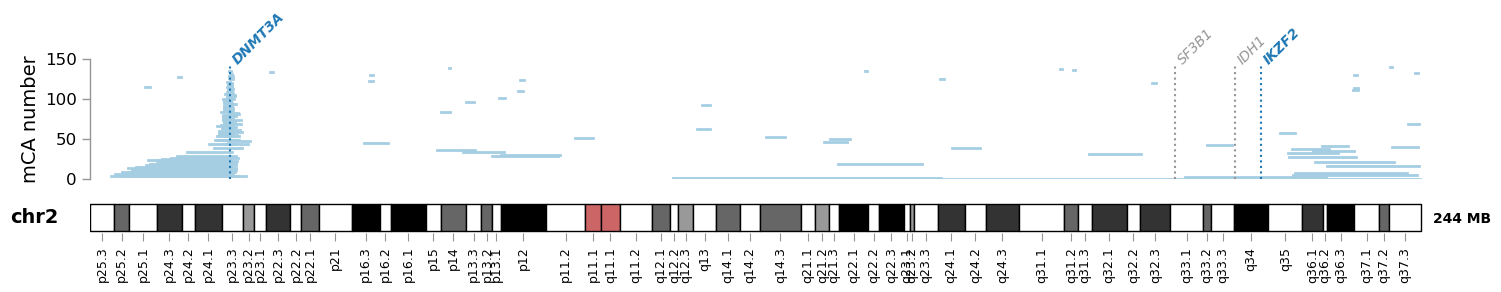

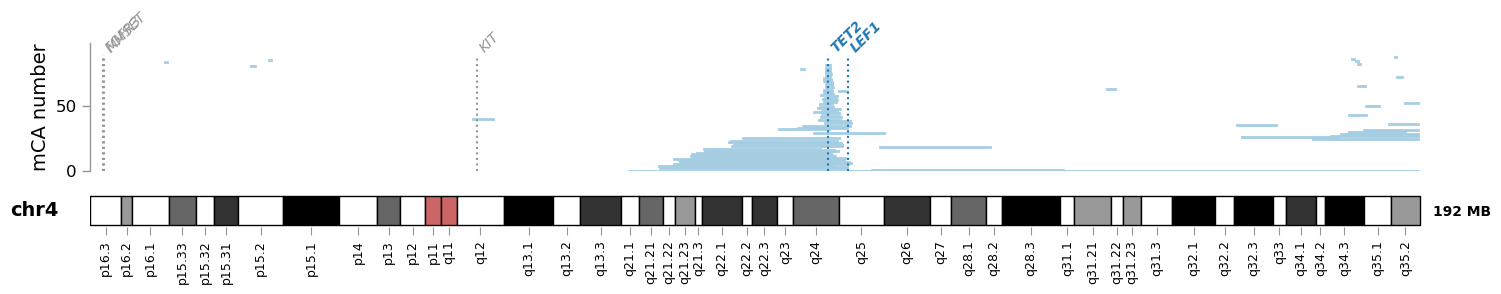

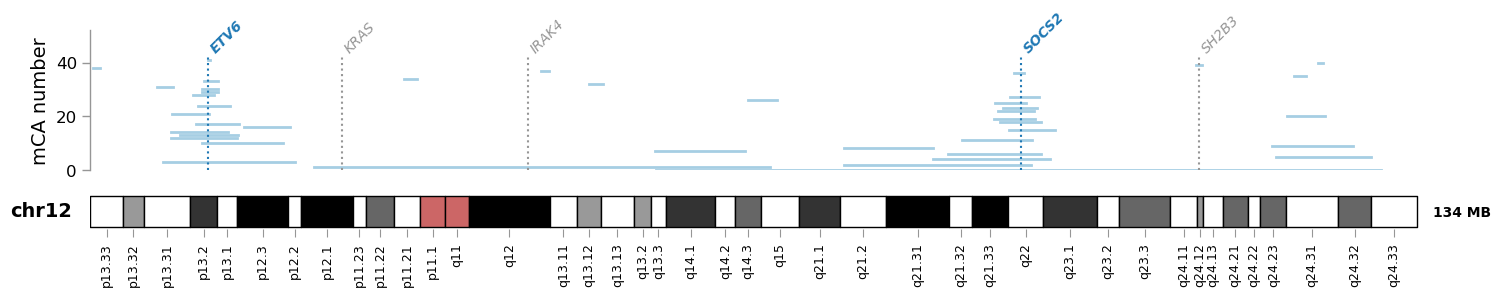

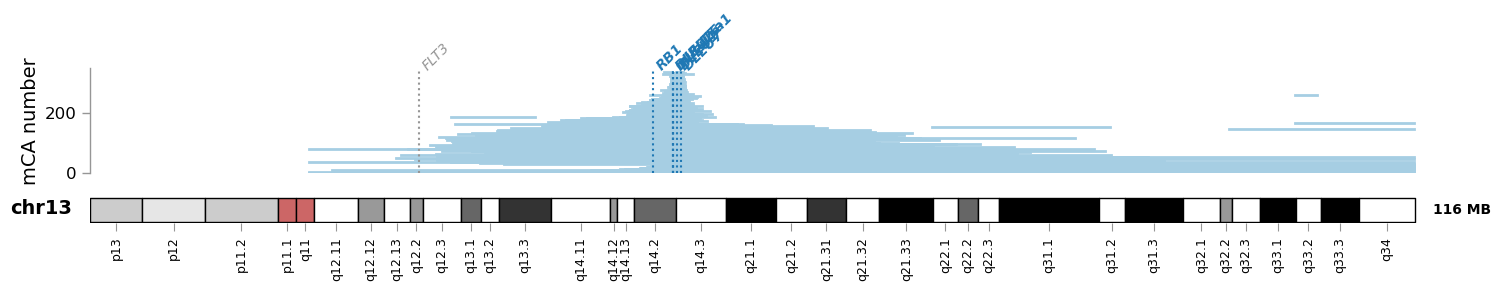

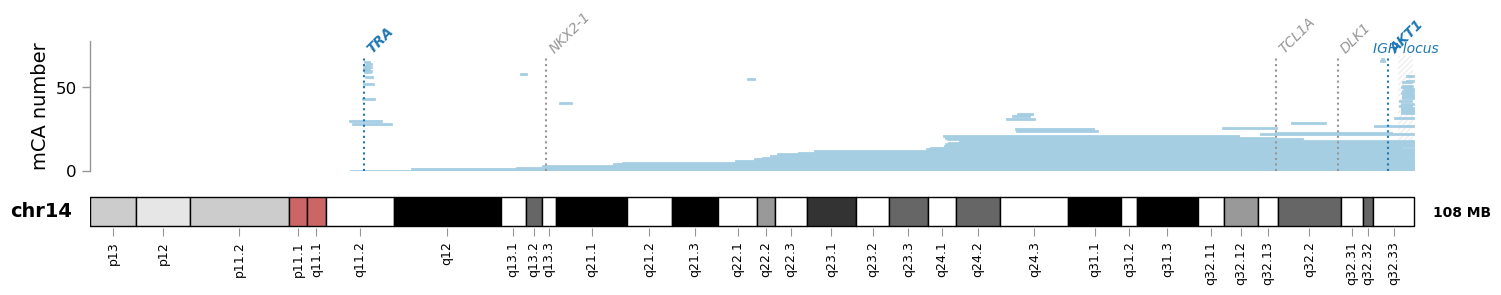

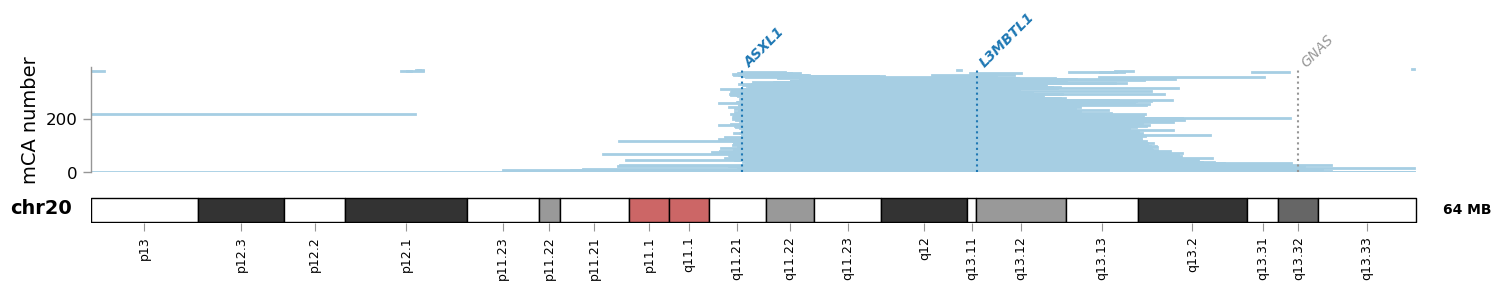

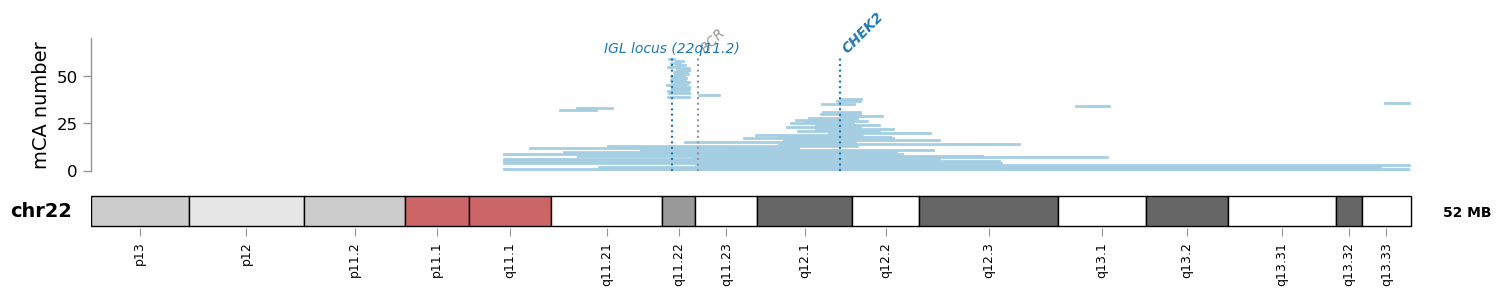

In [29]:
for i in ['chr2', 'chr4', 'chr12', 'chr13', 'chr14', 'chr20', 'chr22']:
    distribution_losses(i, genes_involved_per_chromosome, 1)

# Length dependence of fitness effects and mutation rates

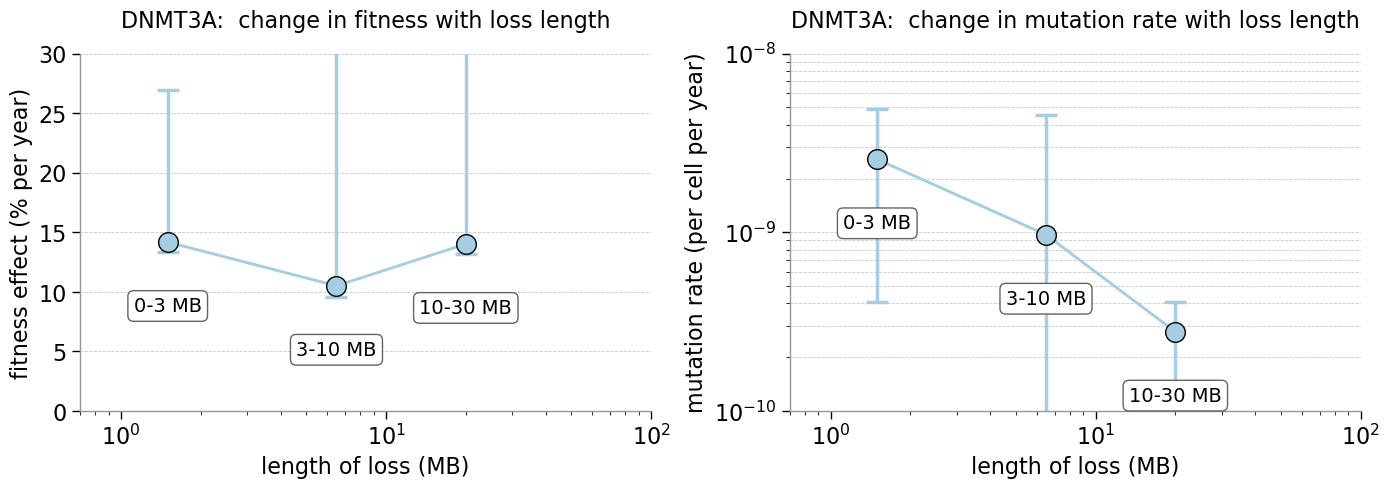

In [44]:
change_s_mu_length_plot('DNMT3A', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)

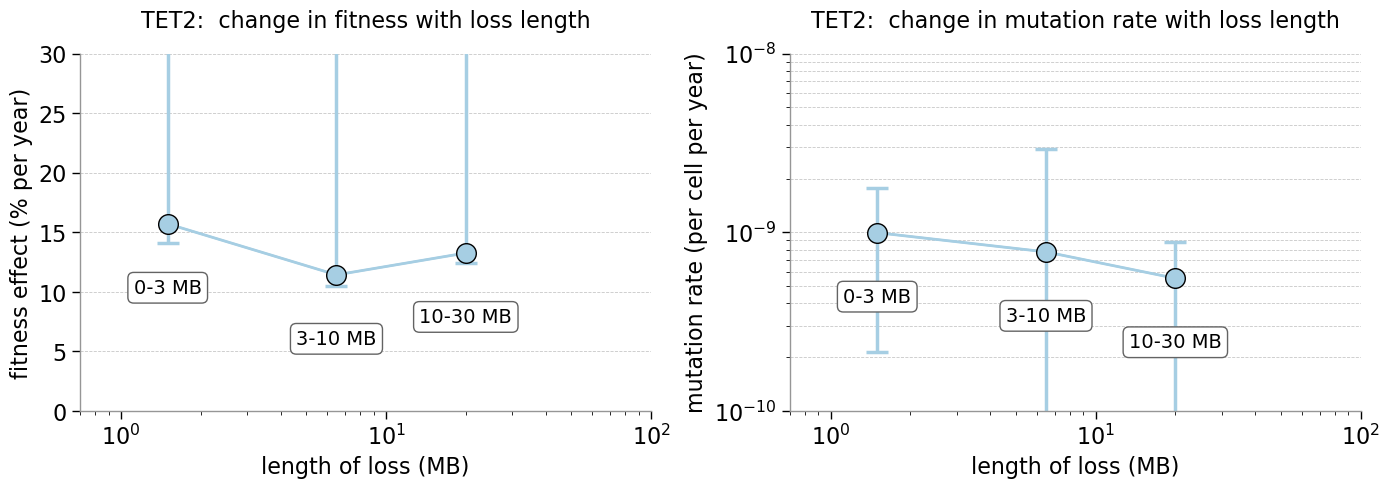

In [45]:
change_s_mu_length_plot('TET2', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)

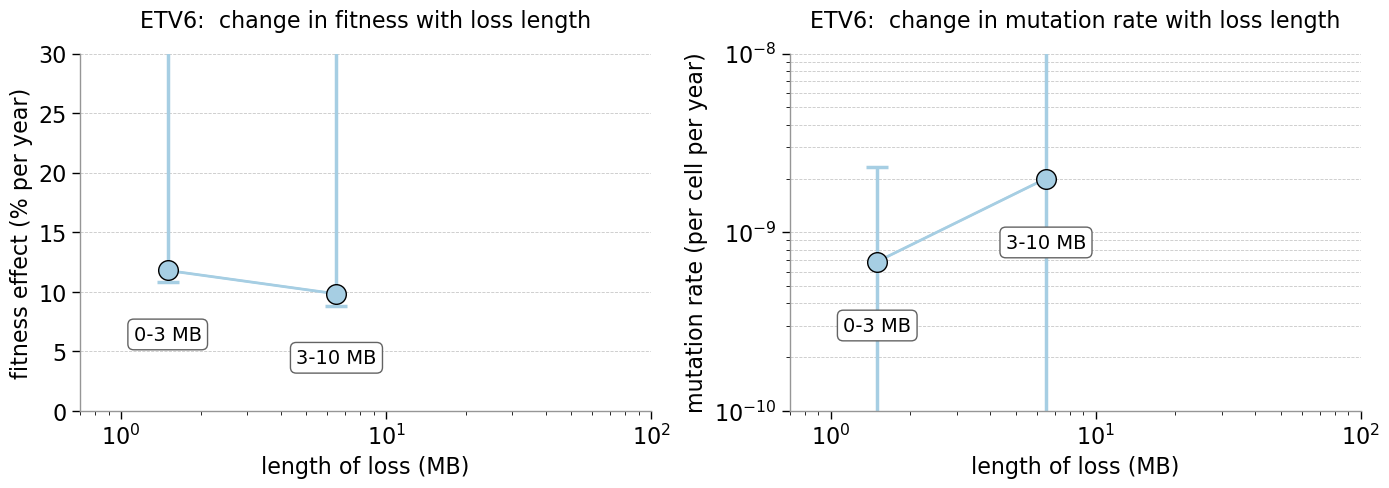

In [46]:
change_s_mu_length_plot('ETV6', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)

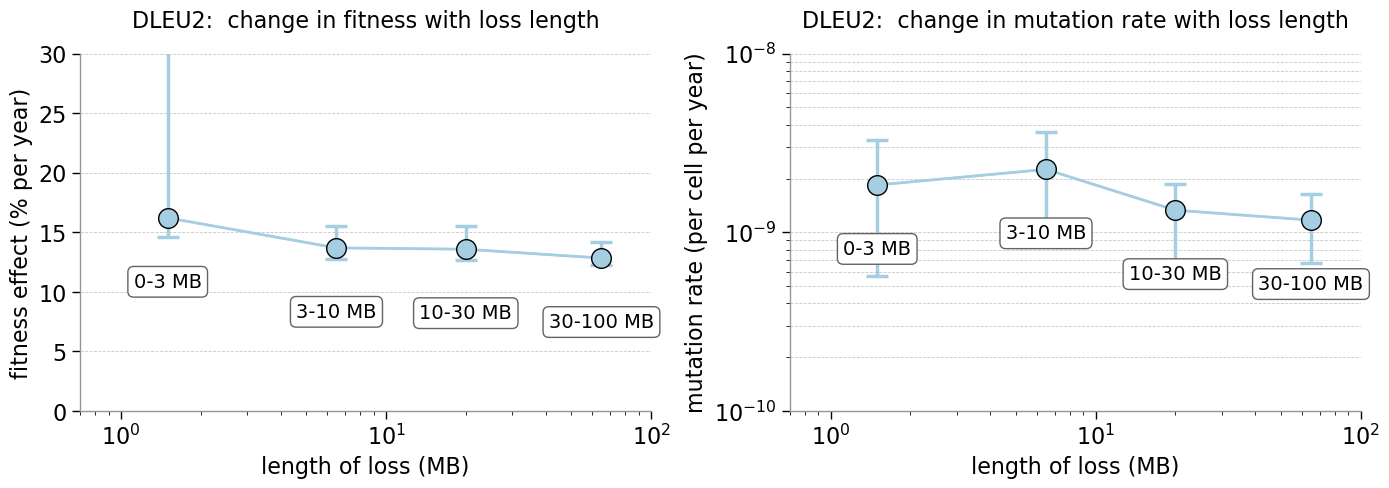

In [47]:
change_s_mu_length_plot('DLEU2', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)

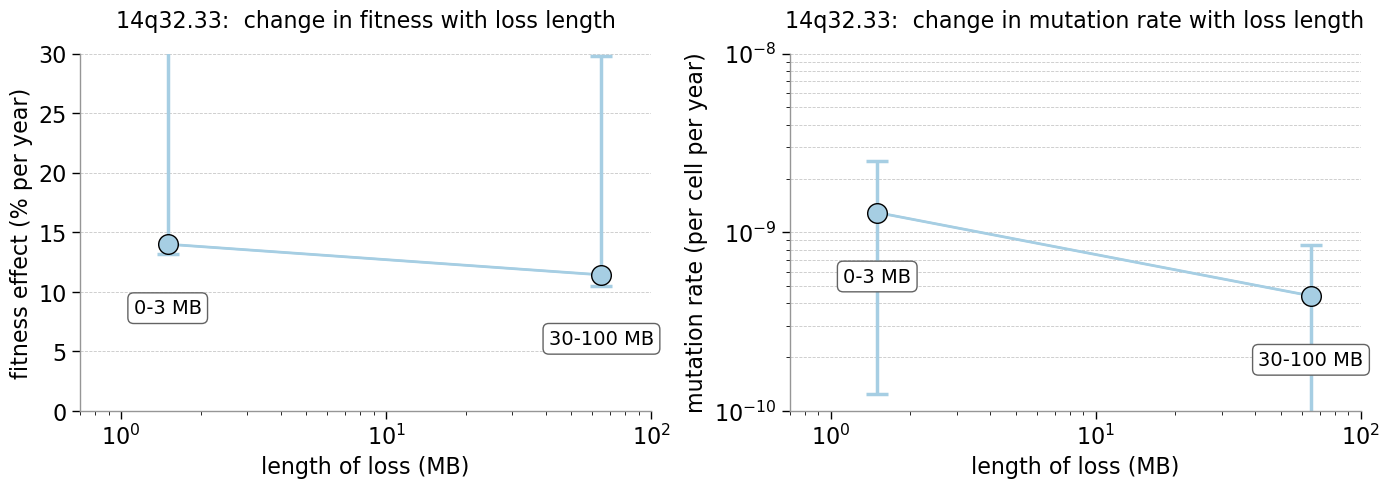

In [48]:
change_s_mu_length_plot('14q32.33', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)

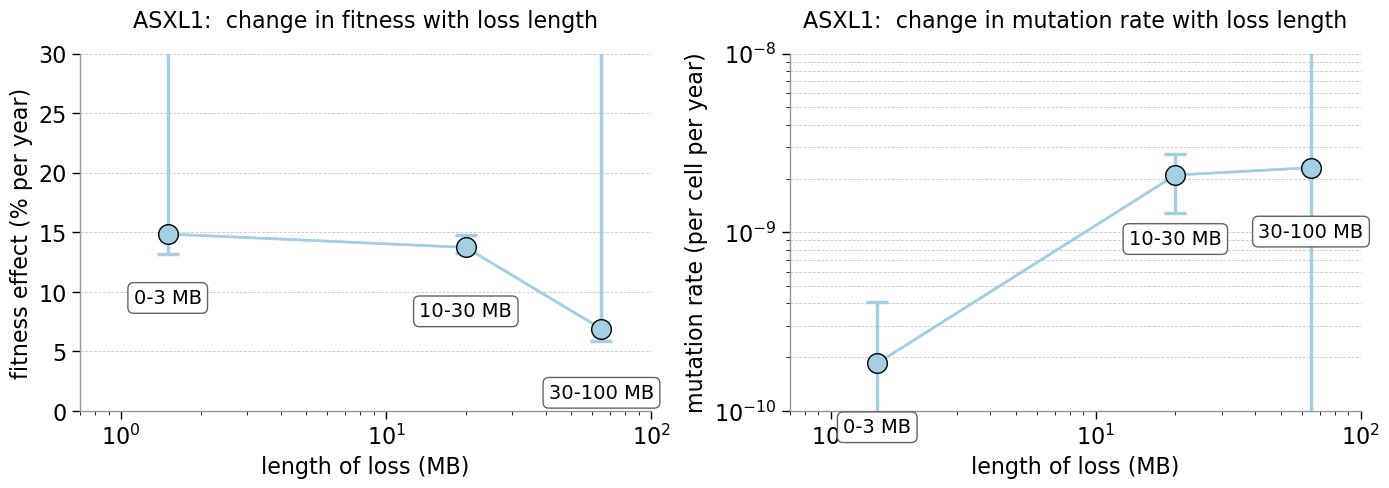

In [49]:
change_s_mu_length_plot('ASXL1', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)

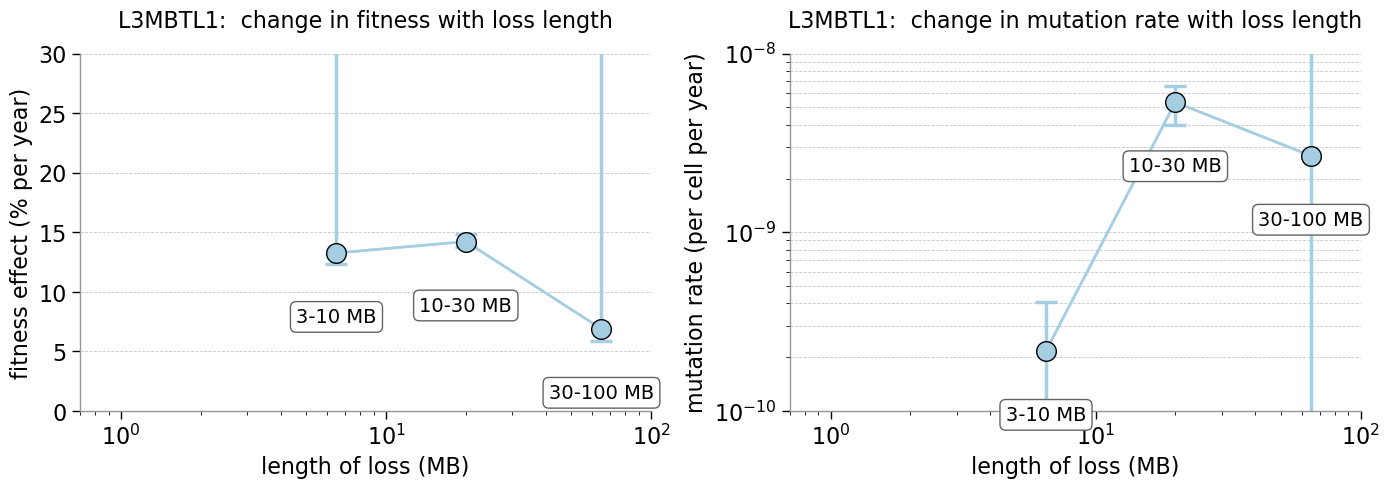

In [50]:
change_s_mu_length_plot('L3MBTL1', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)

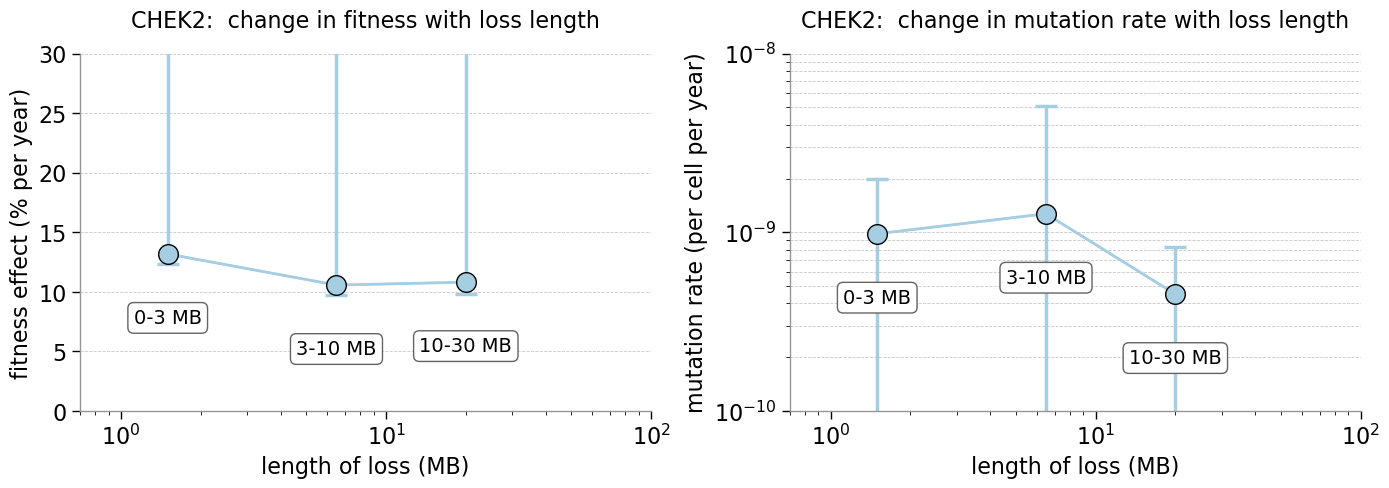

In [51]:
change_s_mu_length_plot('CHEK2', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)

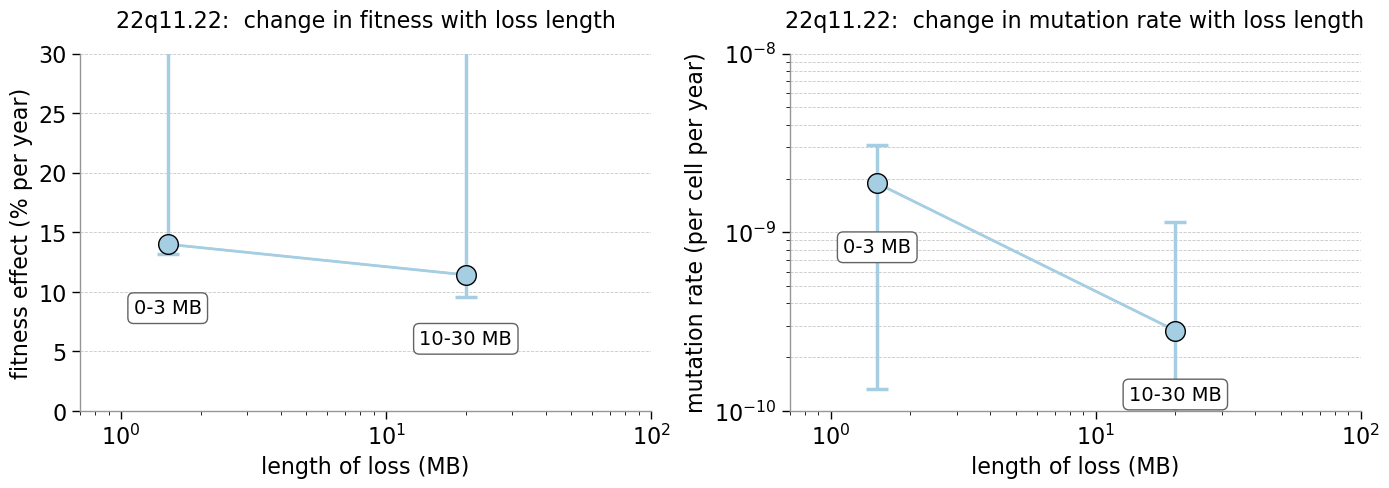

In [52]:
change_s_mu_length_plot('22q11.22', s_mu_length_dependence_dict, 0, 30, 1e-10, 1e-8)